In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta
import networkx as nx

np.random.seed(42)

## Task0

#### Ex. 1

In [11]:
# histogram of normally distributed variable
n = 10000
std = 1.0
x = np.random.normal(loc=0.0, scale=std, size=n)

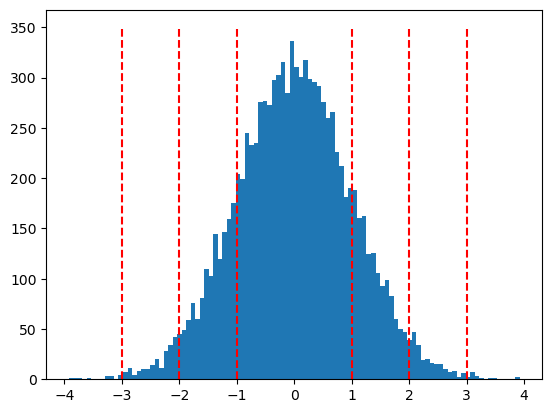

In [12]:
plt.hist(x, bins=100)
plt.vlines(std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(-std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(2*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(-2*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(3*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(-3*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.show()

#### Ex. 2

In [8]:
# Pareto rule for geometric distribution ???
n = 10000
p = 0.5
x = np.random.geometric(p, size=n)
std = np.sqrt((1-p) / p ** 2)
mean = 1 / p

In [22]:
p = 0.2  # geometric distribution parameter
N = 1000  # truncate support to first 1000 terms

# PMF of geometric distribution
k = np.arange(1, N + 1)
pk = (1 - p)**(k - 1) * p

# Normalize just to be safe (numerical stability)
pk /= pk.sum()

# Expected value
E = np.sum(k * pk)

# Sort outcomes by size (descending)
idx = np.argsort(pk)[::-1]
k_sorted = k[idx]
pk_sorted = pk[idx]

# Cumulative contribution to expected value
cum_contrib = np.cumsum(k_sorted * pk_sorted) / E

# Find fraction of outcomes that contribute 80% of expectation
fraction_for_80 = np.searchsorted(cum_contrib, 0.8) / N

print(f"Fraction of largest outcomes (k values) giving 80% of expectation: {fraction_for_80:.3f}")
print(f"Does it match Pareto 80–20 rule? {'Yes' if abs(fraction_for_80 - 0.2) < 0.05 else 'No'}")
# 80% of mass should be covered by 20% of largest/smallest values

Fraction of largest outcomes (k values) giving 80% of expectation: 0.012
Does it match Pareto 80–20 rule? No


In [29]:
np.sum((pk_sorted * k_sorted)[:N//5]) # almost all mass is contained by 20% of largest observations

5.000000000000001

#### Ex. 3

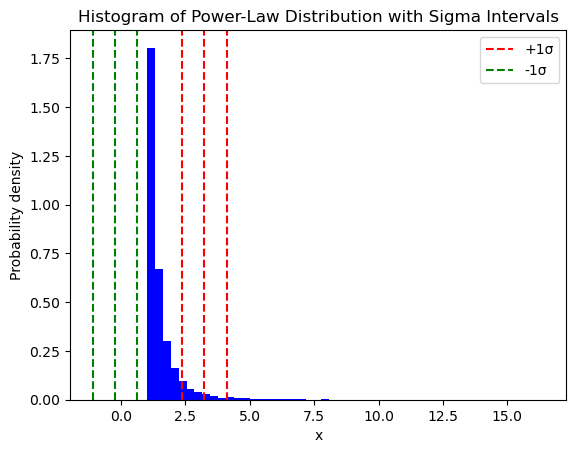

In [46]:
# mean exists if alpha > 2
# variance if alpha > 3

alpha = 4
xmin = 1
N = 10000

# generating uniform samples
u = np.random.uniform(0, 1, N)
# drawing using equation u = F(x) -> x = F^(-1)(u)
x = xmin * (1 - u)**(-1/(alpha - 1))

# computing stats
mu = (alpha - 1) / (alpha - 2) * xmin
sigma = np.sqrt((alpha - 1) / ((alpha - 3)*(alpha - 2)**2) * xmin**2)

plt.hist(x, bins=50, density=True, color='blue')

for k in range(1, 4):
    plt.axvline(mu + k*sigma, color='r', linestyle='--', label=f'+{k}σ' if k==1 else "")
    plt.axvline(mu - k*sigma, color='g', linestyle='--', label=f'-{k}σ' if k==1 else "")

plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Histogram of Power-Law Distribution with Sigma Intervals')
plt.legend()
plt.show()

#### Ex. 4

In [67]:
# checking Pareto rule for Zeta dist
# k discrete: 1, 2, 3, ...
# s > 1

s = 2.5
k_max = 10000

# computing probability mass
k = np.arange(1, k_max+1)
pk = k**(-s) / zeta(s)

# cumulative sum
cum_pk = np.cumsum(pk)
# normalizing for stability
cum_fraction = cum_pk / cum_pk[-1]

# Find fraction of items contributing 80% probability
index_80 = np.searchsorted(cum_fraction, 0.8)
fraction_items = index_80 / k_max

print(f"Fraction of top items contributing 80% of probability: {fraction_items:.2f}")
print(f"index: {index_80}")
print(f"fraction_items: {fraction_items}")

Fraction of top items contributing 80% of probability: 0.00
index: 1
fraction_items: 0.0001


#### Ex. 5

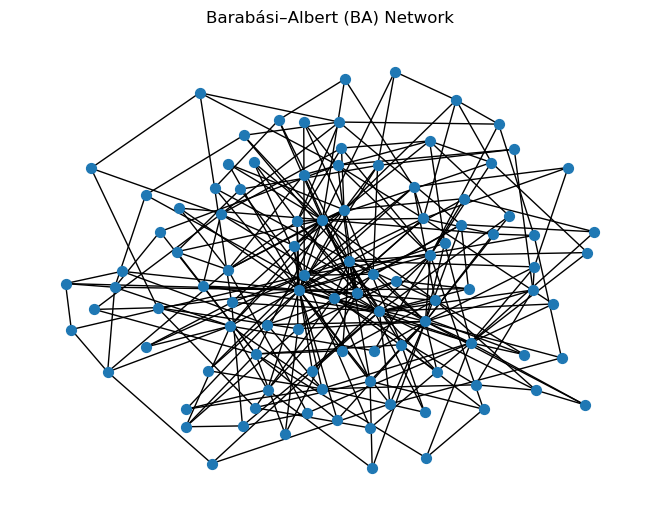

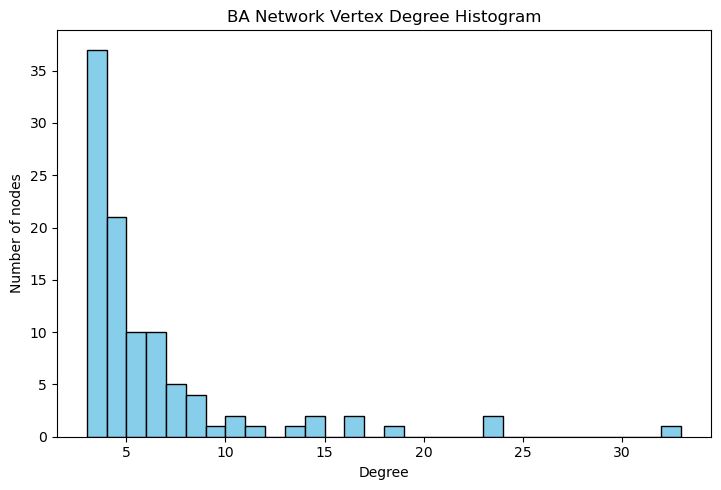

BA Network:
Mean degree: 5.82
Variance of degrees: 23.39


In [80]:
# Barabási–Albert (BA) Network

# nodes
N = 100
# 3 new edges after attaching a new node
m = 3

BA_graph = nx.barabasi_albert_graph(N, m)

nx.draw(BA_graph, node_size=50, with_labels=False)
plt.title("Barabási–Albert (BA) Network")
plt.show()

# hubs - nodes with high degree
# central nodes - hubs

# Compute vertex degrees
BA_degrees = [d for n, d in BA_graph.degree()]

# Plot histograms
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(BA_degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('BA Network Vertex Degree Histogram')

plt.tight_layout()
plt.show()


# mean and variance
BA_mean = np.mean(BA_degrees)
BA_var = np.var(BA_degrees)

print("BA Network:")
print(f"Mean degree: {BA_mean:.2f}")
print(f"Variance of degrees: {BA_var:.2f}\n")

# large variance
# lon tail

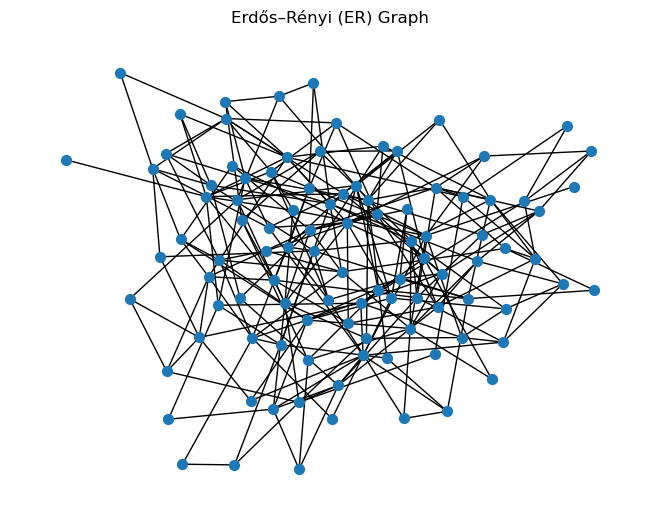

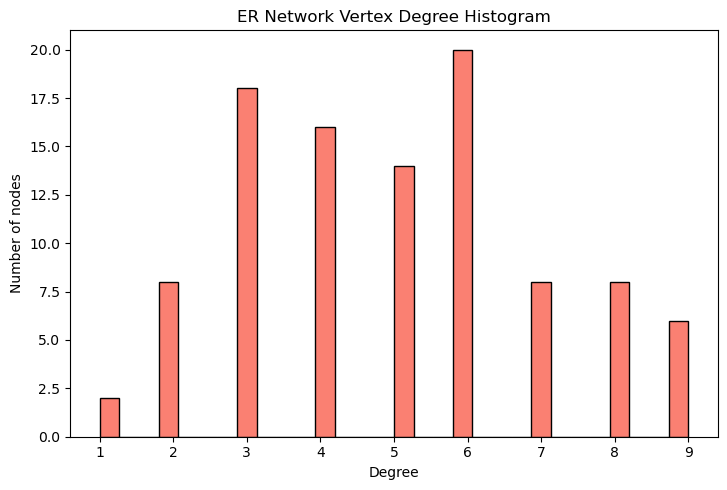

ER Network:
Mean degree: 5.00
Variance of degrees: 4.12


In [81]:
# Erdős–Rényi (ER) Graph

p = 0.05  # probability of edge creation

ER_graph = nx.erdos_renyi_graph(N, p)

nx.draw(ER_graph, node_size=50, with_labels=False)
plt.title("Erdős–Rényi (ER) Graph")
plt.show()

# mainly similar degrees, some hubs in the center

ER_degrees = [d for n, d in ER_graph.degree()]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.hist(ER_degrees, bins=30, color='salmon', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('ER Network Vertex Degree Histogram')

plt.tight_layout()
plt.show()


ER_mean = np.mean(ER_degrees)
ER_var = np.var(ER_degrees)

print("ER Network:")
print(f"Mean degree: {ER_mean:.2f}")
print(f"Variance of degrees: {ER_var:.2f}")

# smaller variance
# similar means
# most nodes near mean

## Task1

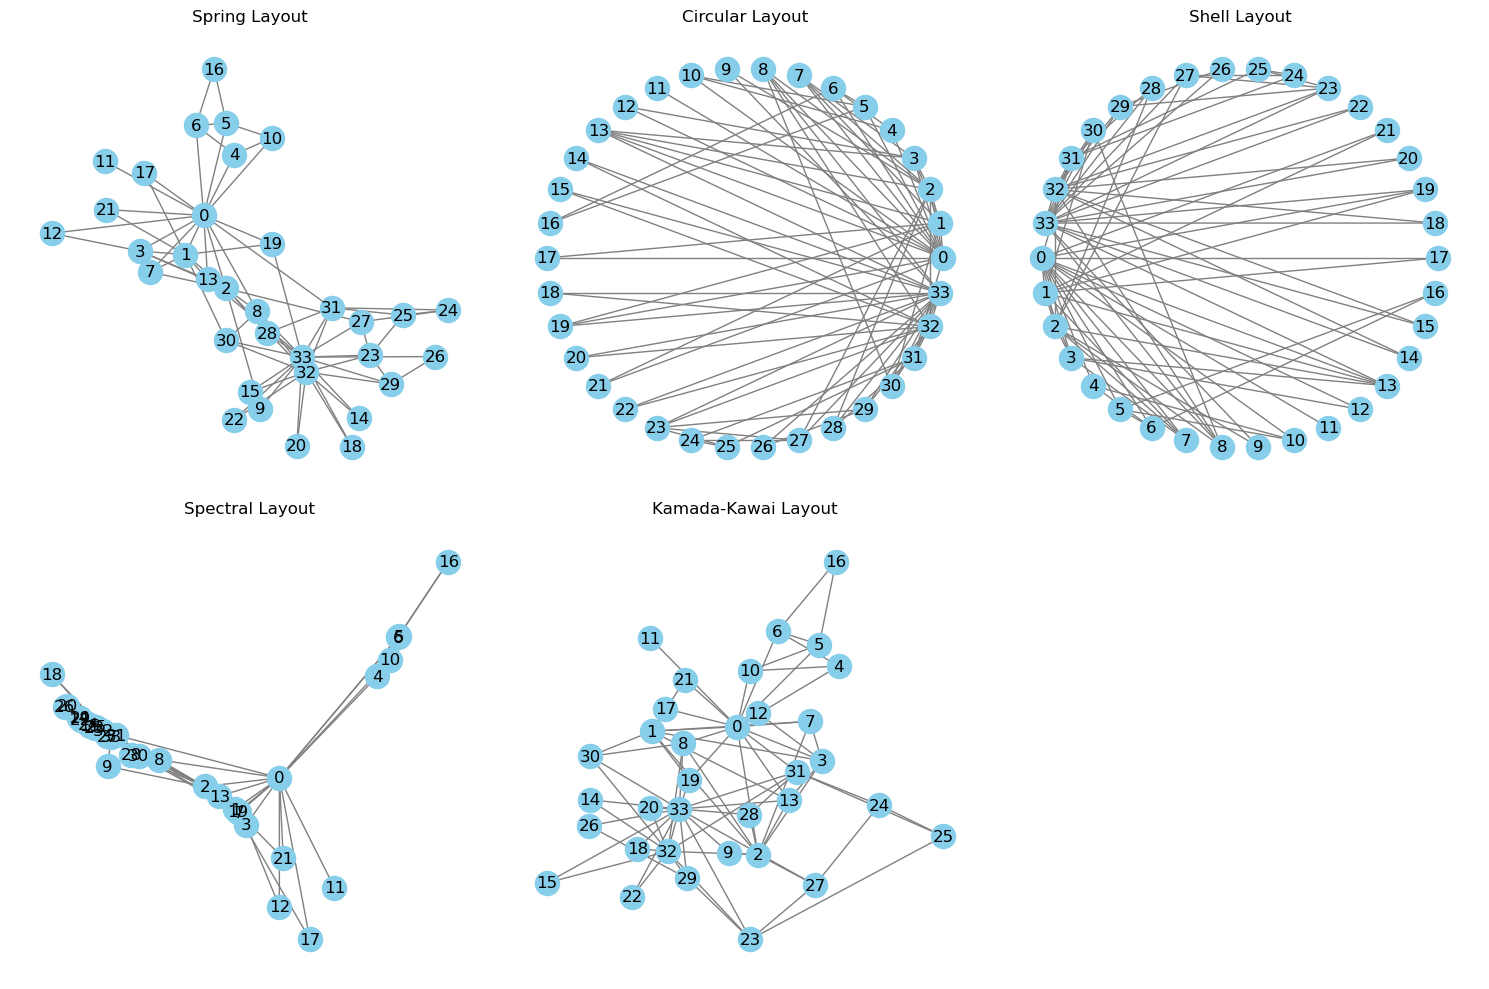

In [2]:
G = nx.karate_club_graph()

layouts = {
    "Spring Layout": nx.spring_layout(G, seed=42),
    "Circular Layout": nx.circular_layout(G),
    "Shell Layout": nx.shell_layout(G),
    "Spectral Layout": nx.spectral_layout(G),
    "Kamada-Kawai Layout": nx.kamada_kawai_layout(G)
}

plt.figure(figsize=(15, 10))

for i, (name, pos) in enumerate(layouts.items(), 1):
    plt.subplot(2, 3, i)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
    plt.title(name)

plt.tight_layout()
plt.show()
# first and last are the best
# circular - well visible nodes, more difficult to see density and structure
# penultimate - not really visible, overlaying nodes and edges

## Task3

In [54]:
# F = kx

# Repulsive Force- between ANY two nodes (even not connected)
# F(i, j) = - k ** 2 * (x_i, x_j) / d(x_i, x_j) ** 2

# Attractive Force - only between connected nodes
# F(i, j) = d(x_i, x_j) * (x_j - x_i) / k


def spring_layout(G, k=1, iterations=10, initial_x=None):
    # initial temperature
    T = 0.1
    
    n = len(G)
    
    # initializing nodes
    if initial_x is None:
        x = np.random.rand(n, 2)
    else:
        x = initial_x
    
    for _ in range(iterations):
        forces = np.zeros((n, 2))
        
        # Repulsive
        for i in range(n):
            for j in range(i+1, n):
                delta = x[i] - x[j]
                dist = np.linalg.norm(delta) + 1e-8
                force = (k / dist) ** 2 * delta
                forces[i] += force
                forces[j] -= force
        
        # Attractive
        for (i, j) in G.edges():
            delta = x[i] - x[j]
            dist = np.linalg.norm(delta) + 1e-8
            force = (dist**2 / k**2) * (delta / dist)
            forces[i] -= force
            forces[j] += force
        
        # update positions
        for i in range(n):
            force_len = np.linalg.norm(forces[i])
            if force_len > 0:
                x[i] += (forces[i] / force_len) * min(force_len, T)
        
        # decrease temperature
        T *= 0.95
    return x


In [55]:
# plotting

def plot_graph(G, points):
    if isinstance(points, np.ndarray):
        pos = {node: points[i] for i, node in enumerate(G.nodes())}
    else:
        pos = points
    
    plt.figure(figsize=(6, 6))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=400,
        node_color='skyblue',
        edge_color='gray',
        font_size=9
    )
    plt.title('Graph visualisation')
    plt.axis('equal')
    plt.show()


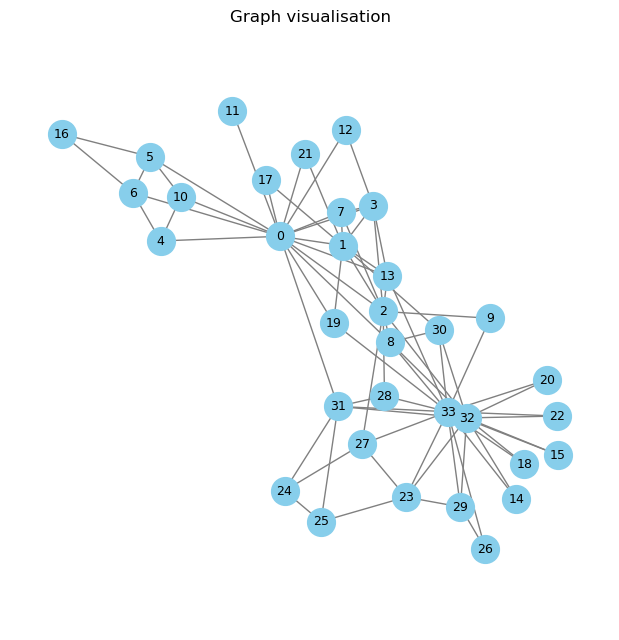

In [59]:
positions = spring_layout(G, iterations=100, k=0.1)
plot_graph(G, positions)

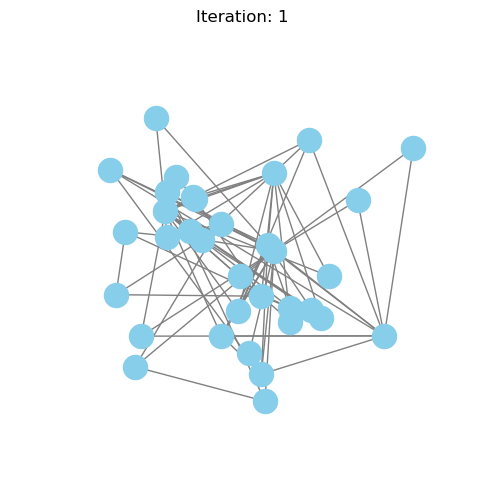

In [72]:
from matplotlib.animation import FuncAnimation

def animate_spring_snapshots(G, frames=50, steps=1, k=0.1):
    """
    Animate your existing spring_layout snapshots into a smooth animation.
    Uses the same logic as your loop but visualizes continuously.
    """
    # Initial positions
    positions = spring_layout(G, iterations=0, k=k)
    nodes = list(G.nodes())
    edges = list(G.edges())

    # Prepare figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title("Spring Layout Evolution")
    ax.axis("off")

    # Draw initial graph
    scat = ax.scatter(positions[:, 0], positions[:, 1], s=300, c='skyblue', zorder=2)
    lines = [ax.plot([], [], 'gray', lw=1, zorder=1)[0] for _ in edges]

    # --- update function called by FuncAnimation ---
    def update(frame):
        nonlocal positions
        # advance simulation for a few steps
        positions = spring_layout(G, iterations=steps, initial_x=positions, k=k)
        scat.set_offsets(positions)
        for line, (u, v) in zip(lines, edges):
            line.set_data([positions[u, 0], positions[v, 0]],
                          [positions[u, 1], positions[v, 1]])
        ax.set_title(f"Iteration: {(frame + 1) * steps}")
        return scat, *lines

    ani = FuncAnimation(
        fig, update, frames=frames, interval=400, blit=True, repeat=False
    )

    plt.show()
    return ani

ani = animate_spring_snapshots(G, frames=50, steps=1, k=0.1)
ani.save("spring_layout_snapshots.gif", writer="pillow", fps=7)

Iteration: 0


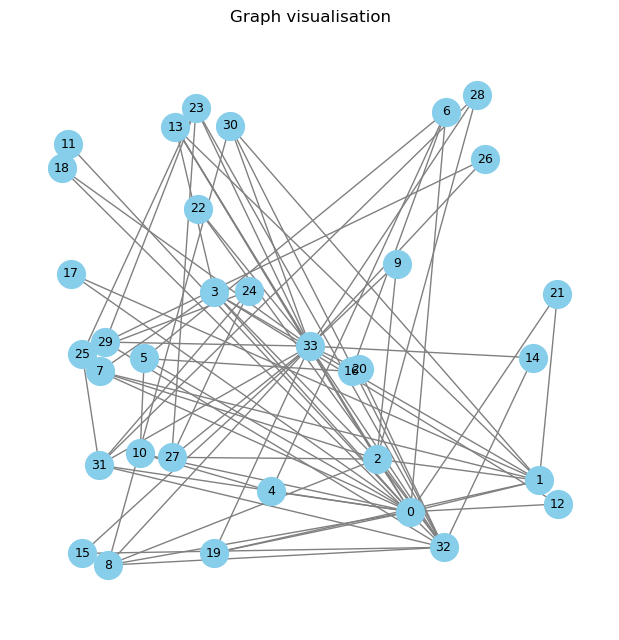

Iteration: 10


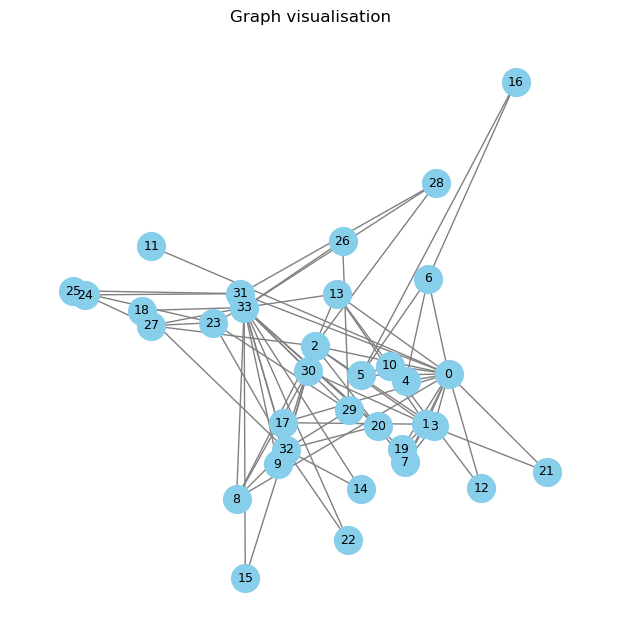

Iteration: 20


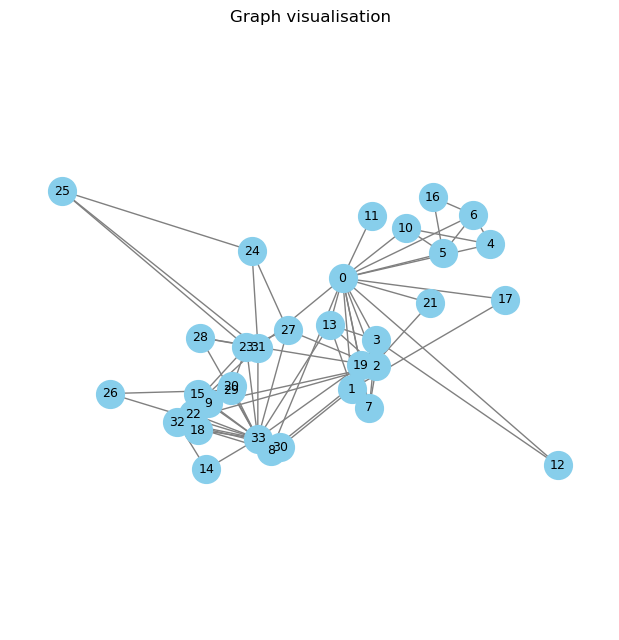

Iteration: 30


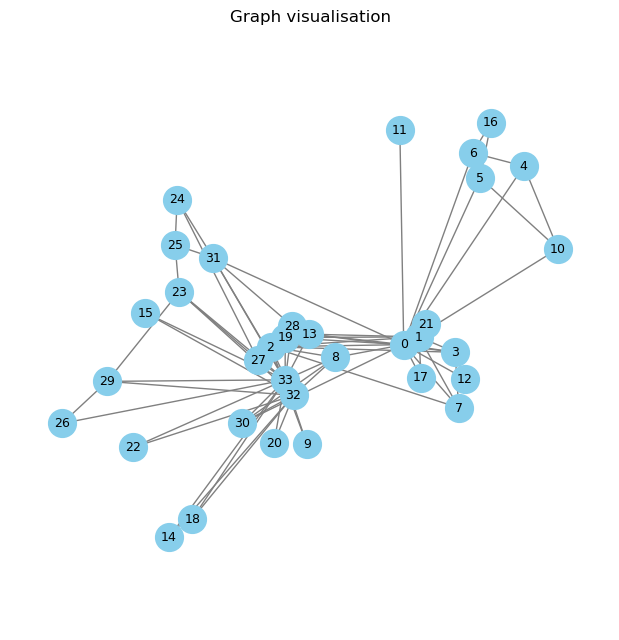

Iteration: 40


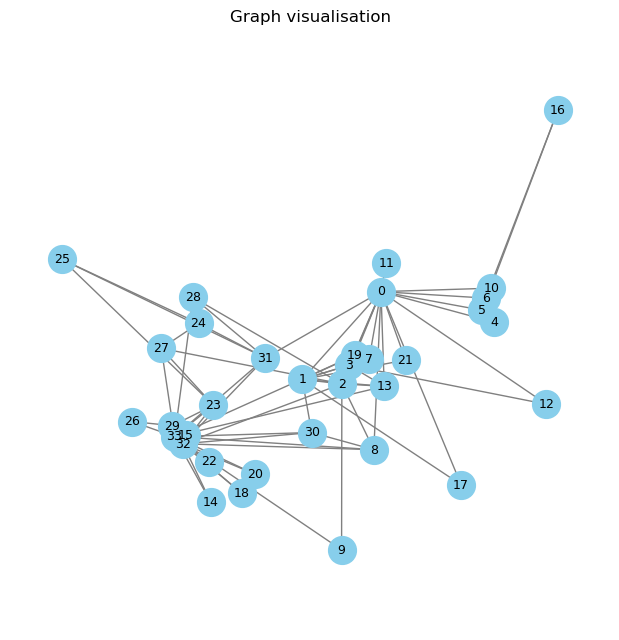

Iteration: 50


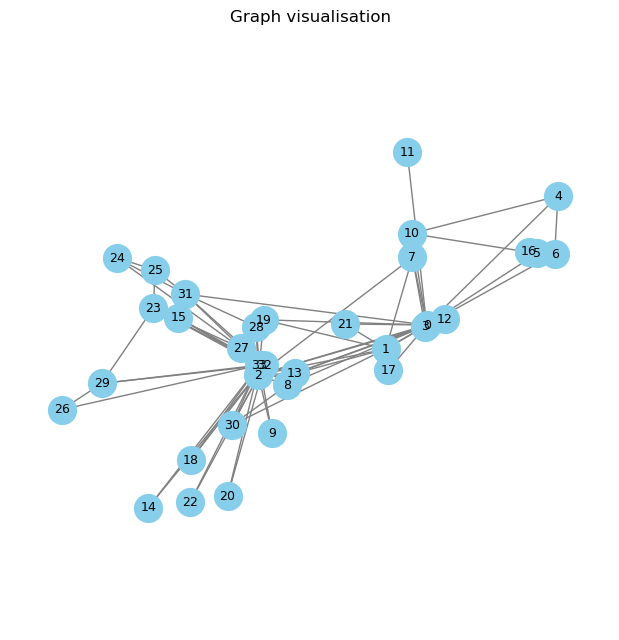

Iteration: 60


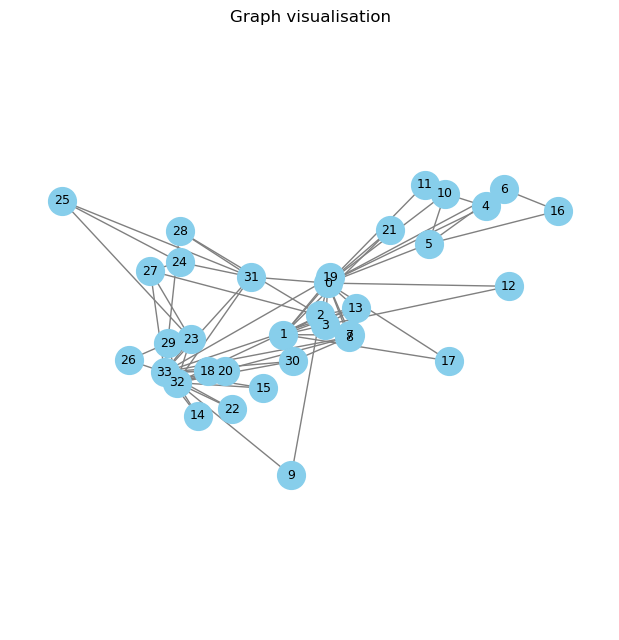

Iteration: 70


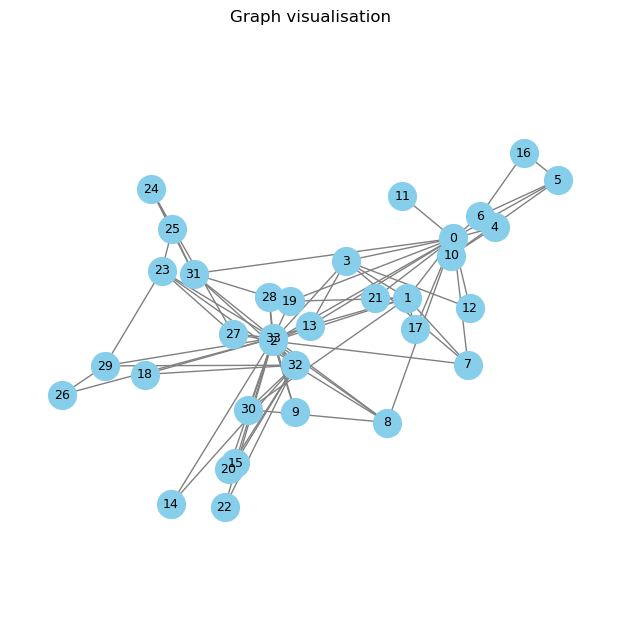

Iteration: 80


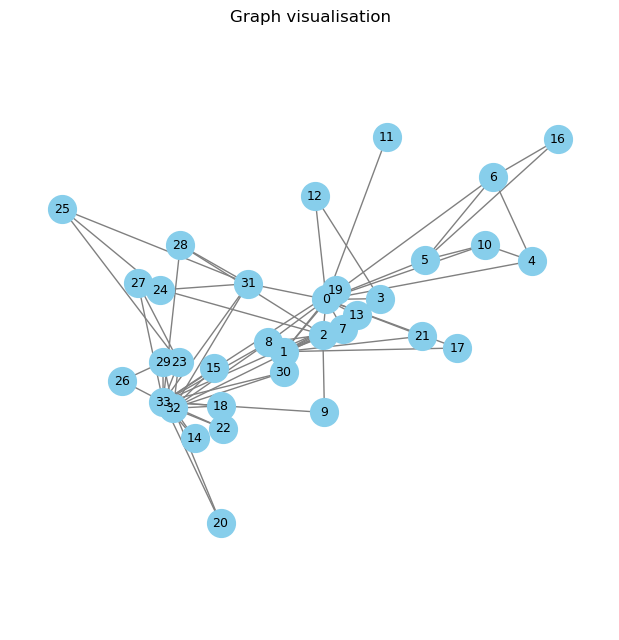

Iteration: 90


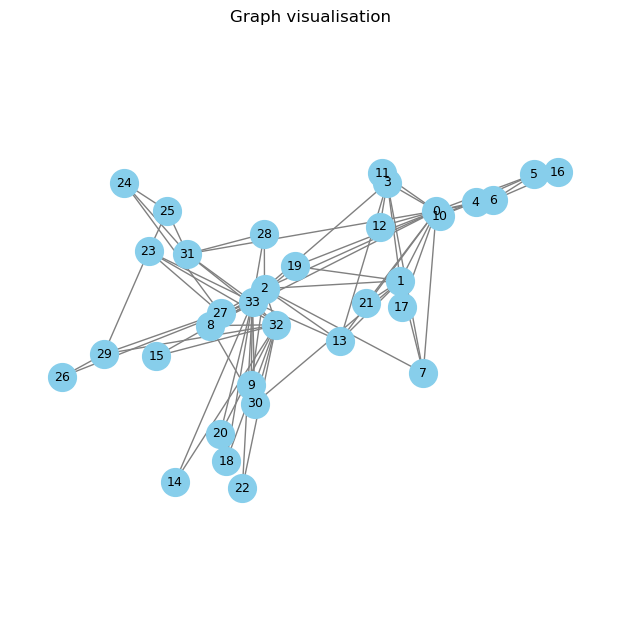

Iteration: 100


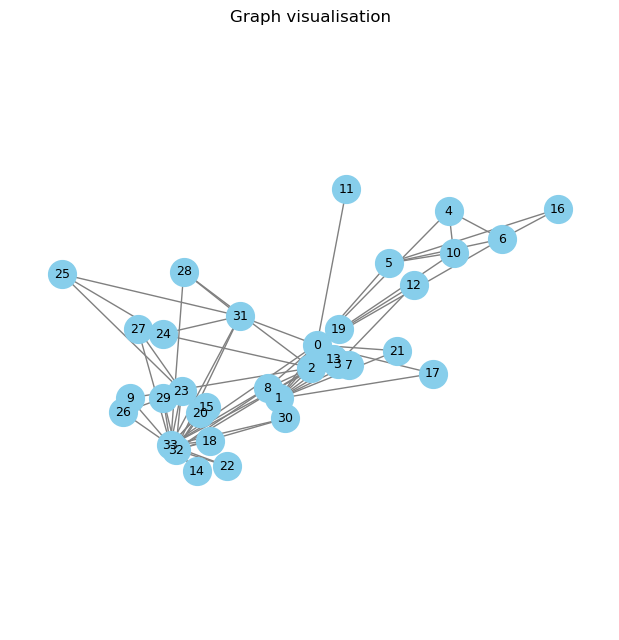

In [60]:
frames = 10
steps = 5
k = 0.1

positions = spring_layout(G, iterations=0, k=k)

print(f"Iteration: {0}")
plot_graph(G, positions)

for i in range(frames):
    positions = spring_layout(G, iterations=steps, initial_x=positions, k=k)
    
    print(f"Iteration: {(i+1) * frames}")
    plot_graph(G, positions)

k=0.1


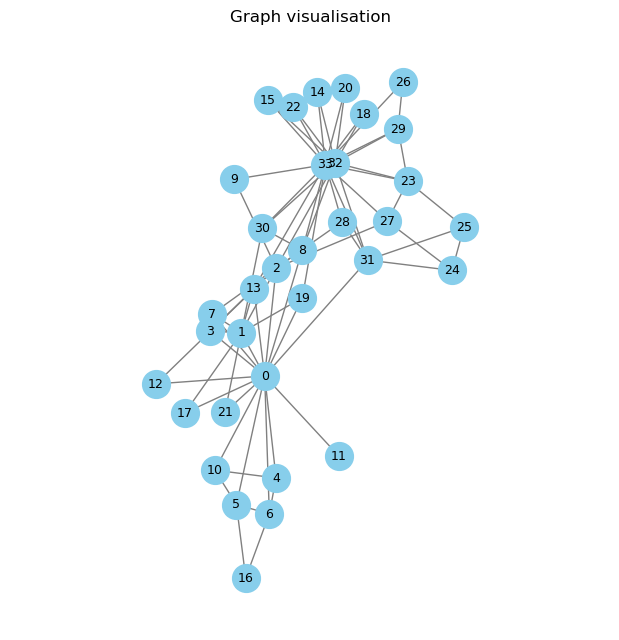

k=0.5


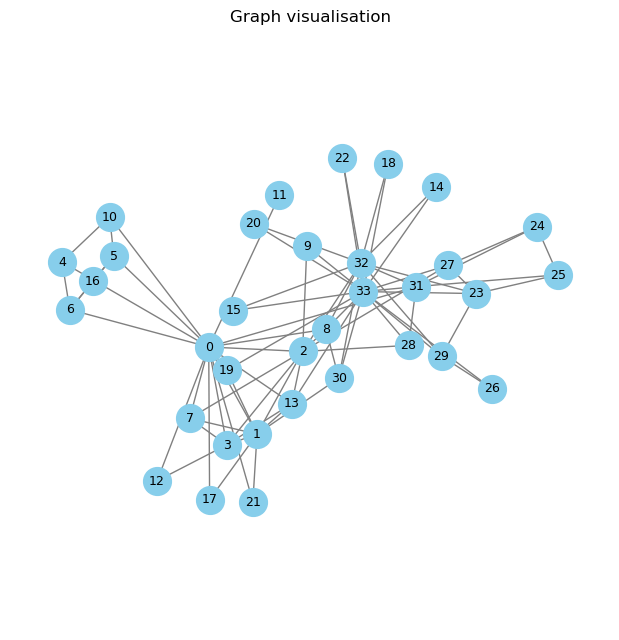

k=1


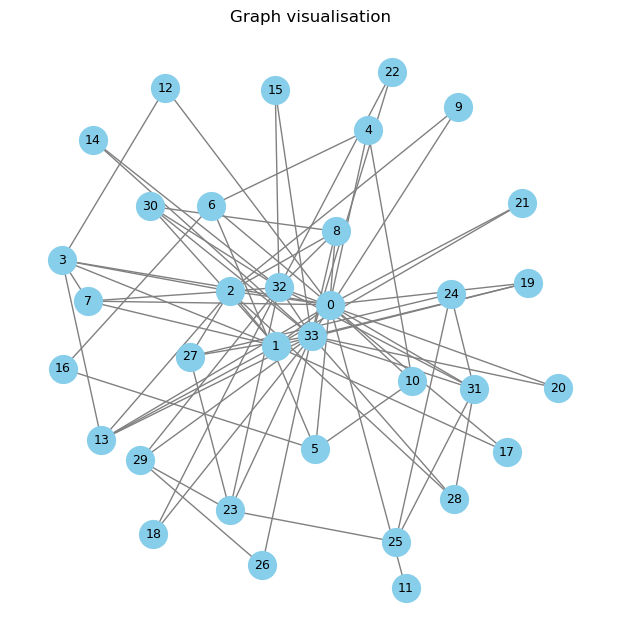

k=5


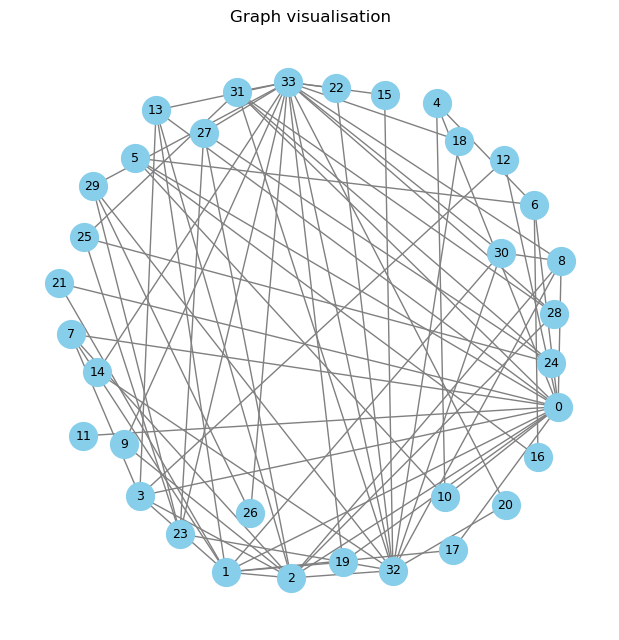

k=10


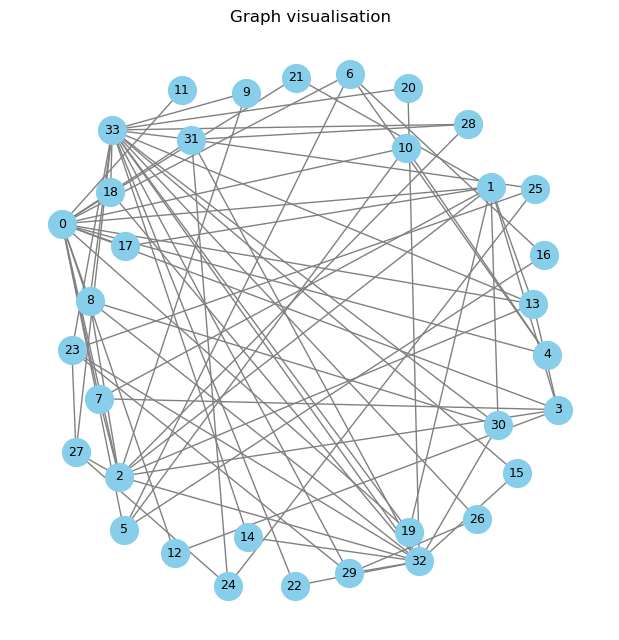

k=100


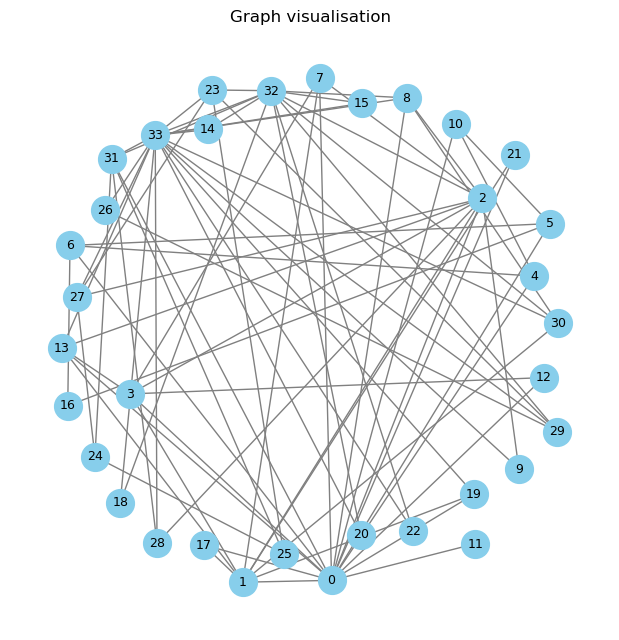

In [62]:
for k in [0.1, 0.5, 1, 5, 10, 100]:
    print(f"k={k}")
    positions = spring_layout(G, iterations=50, k=k)
    plot_graph(G, positions)